In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
N = 1000

In [3]:
ip = np.random.rand(N) > 0.5
ip = ip.astype(int)

In [4]:
Es = 1

In [5]:
eb_no_db = np.arange(0,25)

In [6]:
RxMF_capacity = np.zeros(len(eb_no_db))
RxZF_capacity = np.zeros(len(eb_no_db))
RxMMSE_capacity = np.zeros(len(eb_no_db))
RxMF_R_SVD_capacity = np.zeros(len(eb_no_db))
RxZF_R_SVD_capacity = np.zeros(len(eb_no_db))
RxMMSE_R_SVD_capacity = np.zeros(len(eb_no_db))
jointSvdWithCsit = np.zeros(len(eb_no_db))

In [7]:
def calculate_capacity(nTx,nRx,Rz_inverse):
    
    total_capacity = 0
    
    for ii in range(N):

        H = (1/np.sqrt(2)) * (np.random.randn(nRx,nTx) + 1j * np.random.randn(nRx,nTx))
        

        H_hermitian = np.conjugate(H)

        H_hermitian = np.transpose(H_hermitian)
        
        Ns = np.linalg.matrix_rank(H)
        
        
        P = np.sqrt(Es / Ns) * np.vstack([
        np.eye(Ns),  
        np.zeros((nTx-Ns, Ns))
           ])
        
        
        
        
        P_hermitian = np.conjugate(P)

        P_hermitian = np.transpose(P_hermitian)

        X = np.eye(Ns)

        Y = P_hermitian @ H_hermitian @ Rz_inverse @ H @ P

        Z = X + Y

        Z = np.linalg.det(Z)

        c = np.log2(np.abs(Z))
        
        total_capacity = total_capacity + c 
        
    return total_capacity

In [8]:
def Rx_MF ():
    
    for jj in range(len(eb_no_db)):
        
        snr = 10**(eb_no_db[jj] / 10)
        
        noise_variance = (1/snr)
        
        nTx = 4
        
        nRx = 1
        
        Rz = noise_variance * np.eye(nRx)
        
        Rz_inverse = np.linalg.inv(Rz)
        
        capacity = calculate_capacity(nTx,nRx,Rz_inverse)
        
        capacity = capacity / N
        
        RxZF_capacity[jj] = capacity
        
    return RxZF_capacity

In [9]:
def Rx_ZF ():
    
    for jj in range(len(eb_no_db)):
        
        snr = 10**(eb_no_db[jj] / 10)
        
        noise_variance = (1/snr)
        
        nTx = 4
        
        nRx = 1
        
        Rz = noise_variance * np.eye(nRx)
        
        Rz_inverse = np.linalg.inv(Rz)
        
        capacity = calculate_capacity(nTx,nRx,Rz_inverse)
        
        capacity = capacity / N
        
        RxMF_capacity[jj] = capacity
        
    return RxMF_capacity

In [10]:
def Rx_MMSE ():
    
    for jj in range(len(eb_no_db)):
        
        snr = 10**(eb_no_db[jj] / 10)
        
        noise_variance = (1/snr)
        
        nTx = 4
        
        nRx = 1
        
        Rz = noise_variance * np.eye(nRx)
        
        Rz_inverse = np.linalg.inv(Rz)
        
        capacity = calculate_capacity(nTx,nRx,Rz_inverse)
        
        capacity = capacity / N
        
        
        RxMMSE_capacity[jj] = capacity
        
    return RxMMSE_capacity

In [11]:
def sigma_one(noise_variance,S1):
    
    
    S = [S1]
    
    
    sigma_one_q = []
    
    summation_part = noise_variance / np.square(S1)
    
    mu = (1/len(S)) * (Es + summation_part )
    
    q_optimal = mu - (noise_variance / np.square(S1))
    
    if q_optimal > 0 :
        
        sigma_one_q.append(q_optimal)
        
    
    
    return sigma_one_q

In [12]:
def diagonalQ(S,noise_variance):
    
    
    S1 = S[0]
    
    S = [S1]
    
    q_optimal_1 = sigma_one(noise_variance,S1)
    
    return q_optimal_1

In [13]:
def calculate_capacity_R_svd(nTx,nRx,Rz_inverse,noise_variance):
    
    total_capacity = 0
    
    for ii in range(N):
        
        H = (1/np.sqrt(2)) * (np.random.randn(nRx,nTx) + 1j * np.random.randn(nRx,nTx))
        
        H_hermitian = np.conjugate(H)
        
        H_hermitian = np.transpose(H_hermitian)
        
        U,S,Vh = np.linalg.svd(H,full_matrices=False)
        
        
        
        V = np.conjugate(Vh)
        
        V = np.transpose(V)
        
        Q = diagonalQ(S,noise_variance)
        
        Ns = len(Q)
        
        
        q_sqrt = np.sqrt(Q)
        
        q_sqrt = q_sqrt[:4]
        
        q_sqrt = np.pad(q_sqrt, (0, 4 - len(q_sqrt)), mode='constant', constant_values=0)
        
        Q_matrix = np.diag(q_sqrt)
        

        P = V[:,0:Ns] @ Q_matrix[0:Ns,0:Ns]
        
        
        P_hermitian = np.conjugate(P)
        
        P_hermitian = np.transpose(P_hermitian)
        
        Z = np.eye(Ns) + P_hermitian @ H_hermitian @ Rz_inverse @ H @ P
        
        Z = np.linalg.det(Z)

        c = np.log2(np.abs(Z))
        
        total_capacity = total_capacity + c
        
    return total_capacity

In [14]:
def RxMF_R_SVD():
    
    for jj in range(len(eb_no_db)):
        
        snr = 10**(eb_no_db[jj] / 10)
        
        Es = 1
        
        noise_variance = (1/snr)
        
        
        nTx = 4
        
        nRx = 1
        
        Rz = noise_variance * np.eye(nRx)
        
        Rz_inverse = np.linalg.inv(Rz)
        
        capacity = calculate_capacity_R_svd(nTx,nRx,Rz_inverse,noise_variance)
        
        RxMF_R_SVD_capacity[jj] = capacity / N
        
    return RxMF_R_SVD_capacity

In [15]:
def RxZF_R_SVD():
    
    for jj in range(len(eb_no_db)):
        
        snr = 10**(eb_no_db[jj] / 10)
        
        Es = 1
        
        noise_variance = (1/snr)
        
        nTx = 4
        
        nRx = 1
        
        Rz = noise_variance * np.eye(nRx)
        
        Rz_inverse = np.linalg.inv(Rz)
        
        
        capacity = calculate_capacity_R_svd(nTx,nRx,Rz_inverse,noise_variance)
        
        RxZF_R_SVD_capacity[jj] = capacity / N
        
    return RxZF_R_SVD_capacity

In [16]:
def RxMMSE_R_SVD():
    
    for jj in range(len(eb_no_db)):
        
        snr = 10**(eb_no_db[jj] / 10)
        
        Es = 1
        
        noise_variance = (1/snr)
        
        nTx = 4
        
        nRx = 1
        
        Rz = noise_variance * np.eye(nRx)
        
        Rz_inverse = np.linalg.inv(Rz)
        
        
        
        capacity = calculate_capacity_R_svd(nTx,nRx,Rz_inverse,noise_variance)
        
        RxMMSE_R_SVD_capacity[jj] = capacity / N
        
    return RxMMSE_R_SVD_capacity


In [17]:
def capacity(noise_variance,S):
    
    S1 = S[0]
    
    S = [S1]
    
    total_capacity = 0
    
    q_optimal_1 = sigma_one(noise_variance,S1)
    
    c = np.log2(1 + (1/noise_variance)* np.square(S1) * q_optimal_1[0])
    
    return c

In [18]:
def joint_svd_with_csit():
    
    for jj in range(len(eb_no_db)):
        
        snr = 10**(eb_no_db[jj] / 10)
        
        nTx = 4
        
        nRx = 1
        
        Rz = (1/snr) * np.eye(nRx)
        
        Rz_inverse = np.linalg.inv(Rz )
        
        noise_variance = (1/snr)
        
        total_capacity = 0
        
        for ii in range(N):
            
            H = (1/np.sqrt(2)) * (np.random.randn(nRx,nTx) + 1j * np.random.randn(nRx,nTx))
            
            U,S,Vh = np.linalg.svd(H)
            
            capacity_values = capacity(noise_variance,S)
            
            total_capacity = total_capacity + capacity_values
            
        jointSvdWithCsit[jj] = total_capacity / N
    
    return jointSvdWithCsit

<Figure size 432x288 with 0 Axes>

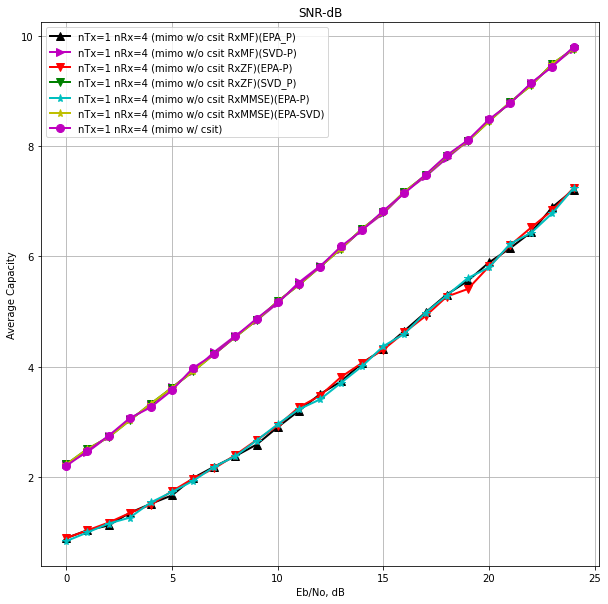

In [19]:
rxmf = Rx_MF ()

rxmf_reduced_svd=RxMF_R_SVD()

rxzf = Rx_ZF()

rxzf_reduced_svd = RxZF_R_SVD()

rxmmse =Rx_MMSE ()

rxzf_reduced_svd =RxMMSE_R_SVD()

svd_with_csit = joint_svd_with_csit()

plt.figure()

plt.figure(figsize=(10, 10))

plt.plot(eb_no_db, rxmf, 'k^-', linewidth=2, markersize=8, label='nTx=1 nRx=4 (mimo w/o csit RxMF)(EPA_P)')

plt.plot(eb_no_db, rxmf_reduced_svd, 'm>-', linewidth=2, markersize=8, label='nTx=1 nRx=4 (mimo w/o csit RxMF)(SVD-P)')

plt.plot(eb_no_db, rxzf, 'rv-', linewidth=2, markersize=8, label='nTx=1 nRx=4 (mimo w/o csit RxZF)(EPA-P)')

plt.plot(eb_no_db, rxzf_reduced_svd, 'gv-', linewidth=2, markersize=8, label='nTx=1 nRx=4 (mimo w/o csit RxZF)(SVD_P)')

plt.plot(eb_no_db, rxmmse, 'c*-', linewidth=2, markersize=8, label='nTx=1 nRx=4 (mimo w/o csit RxMMSE)(EPA-P)')

plt.plot(eb_no_db, rxzf_reduced_svd, 'y*-', linewidth=2, markersize=8, label='nTx=1 nRx=4 (mimo w/o csit RxMMSE)(EPA-SVD)')

plt.plot(eb_no_db, svd_with_csit, 'mo-', linewidth=2, markersize=8, label='nTx=1 nRx=4 (mimo w/ csit)')

plt.grid(True)
plt.legend()
plt.xlabel('Eb/No, dB')
plt.ylabel('Average Capacity')
plt.title('SNR-dB')
plt.show()